In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('airquality_data.csv', encoding='cp1252')

<ipython-input-32-0685b0be1a1e>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airquality_data.csv', encoding='cp1252')


In [33]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298368 entries, 0 to 298367
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     198765 non-null  object 
 1   sampling_date                298368 non-null  object 
 2   state                        298368 non-null  object 
 3   location                     298368 non-null  object 
 4   agency                       195518 non-null  object 
 5   type                         294424 non-null  object 
 6   so2                          270047 non-null  float64
 7   no2                          285869 non-null  float64
 8   rspm                         269762 non-null  float64
 9   spm                          136145 non-null  float64
 10  location_monitoring_station  278725 non-null  object 
 11  pm2_5                        7866 non-null    float64
 12  date                         298364 non-null  object 
dtyp

In [35]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [36]:
# Change data type from float64 to float32 for Space Complexity
df['so2'] = df['so2'].astype('float32')
df['no2'] = df['no2'].astype('float32')
df['rspm'] = df['rspm'].astype('float32')
df['spm'] = df['spm'].astype('float32')
df['date'] = df['date'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298368 entries, 0 to 298367
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     198765 non-null  object 
 1   sampling_date                298368 non-null  object 
 2   state                        298368 non-null  object 
 3   location                     298368 non-null  object 
 4   agency                       195518 non-null  object 
 5   type                         294424 non-null  object 
 6   so2                          270047 non-null  float32
 7   no2                          285869 non-null  float32
 8   rspm                         269762 non-null  float32
 9   spm                          136145 non-null  float32
 10  location_monitoring_station  278725 non-null  object 
 11  pm2_5                        7866 non-null    float64
 12  date                         298364 non-null  string 
dtyp

In [37]:
df=df.drop_duplicates()

In [38]:
df.isna().sum()

,0
stn_code,99603
sampling_date,0
state,0
location,0
agency,102840
type,3919
so2,28313
no2,12492
rspm,28476
spm,161776


In [39]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [40]:
percent_missing.sort_values(ascending=False)

,0
pm2_5,97.358532
spm,54.325714
agency,34.534519
stn_code,33.447508
rspm,9.562475
so2,9.507739
location_monitoring_station,6.552290
no2,4.194917
type,1.316032
date,0.001343


In [41]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)

In [42]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [43]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [44]:
col_var = ['state', 'location', 'type','date']
col_num = ['so2','no2','rspm','spm']

In [45]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [46]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0


In [47]:
df

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.400000,95.219452,191.922379,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.000000,95.219452,191.922379,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.500000,95.219452,191.922379,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.700000,95.219452,191.922379,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.500000,95.219452,191.922379,1990-03-01
...,...,...,...,...,...,...,...,...
298363,Punjab,Gobindgarh,Residential and others,10.0,28.000000,210.000000,191.922379,2007-02-08
298364,Punjab,Gobindgarh,Residential and others,11.0,25.299999,215.000000,191.922379,2007-04-08
298365,Punjab,Gobindgarh,Residential and others,13.7,25.000000,231.000000,191.922379,2007-07-08
298366,Punjab,Gobindgarh,Residential and others,17.6,36.000000,458.000000,191.922379,2007-04-17


In [48]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0


In [49]:
#DAta integration
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]

In [50]:
subSet1.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [51]:
subSet2.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [52]:
concatenated_df = pd.concat([subSet1, subSet2], axis=1)

In [53]:
concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
298363,Punjab,Residential and others,Punjab,Gobindgarh
298364,Punjab,Residential and others,Punjab,Gobindgarh
298365,Punjab,Residential and others,Punjab,Gobindgarh
298366,Punjab,Residential and others,Punjab,Gobindgarh


In [54]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [55]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [56]:
# Remove outliers for each column using a loop
col_name = ['so2', 'no2', 'rspm', 'spm']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

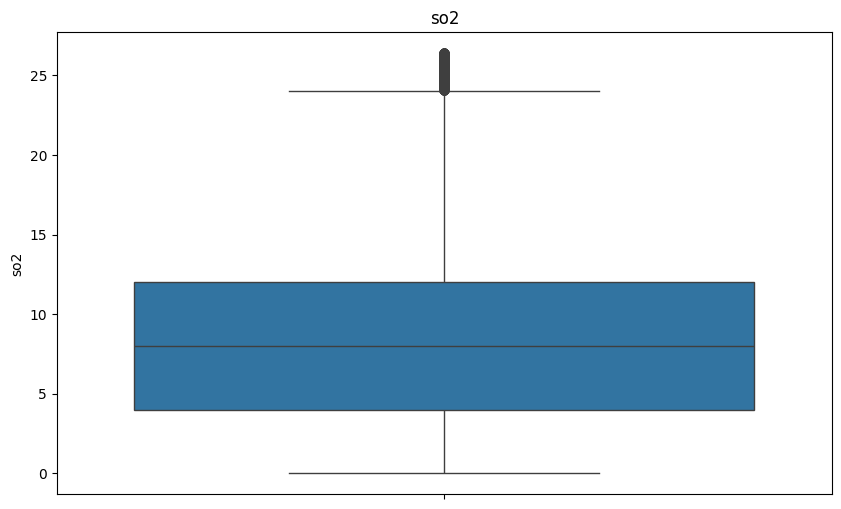

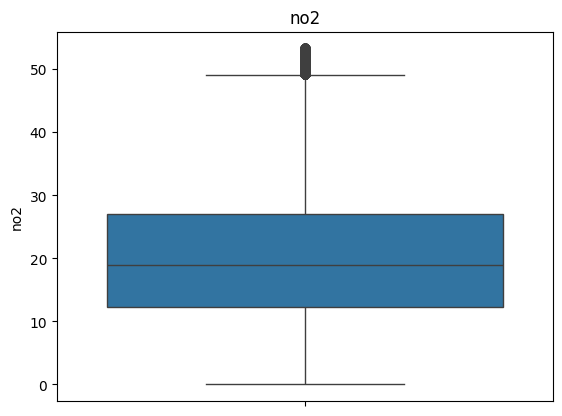

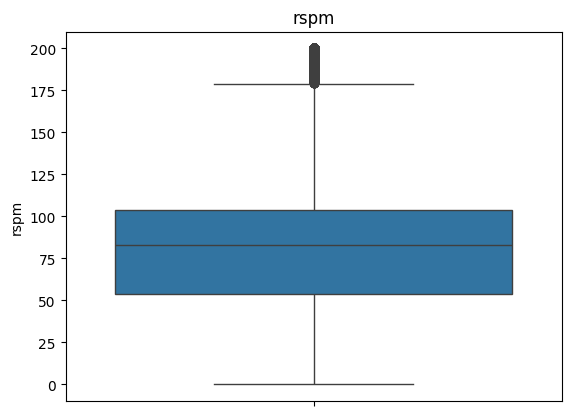

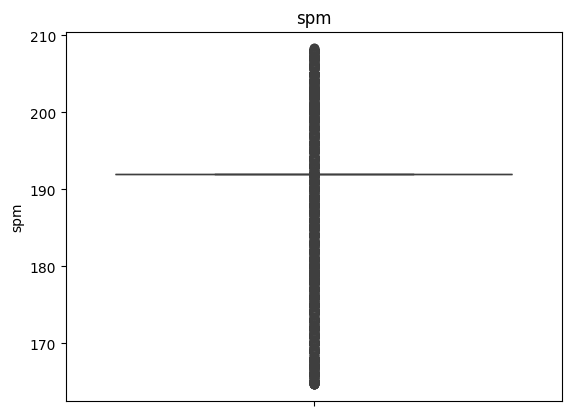

In [58]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [59]:
#data transform
from sklearn.preprocessing import LabelEncoder

col_label= ['state','location','type']
# Initialize LabelEncoder

encoder = LabelEncoder()
# Iterate over columns
for col in df.columns:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])

In [60]:

df

,state,location,type,so2,no2,rspm,spm,date
0,0,82,6,365,1393,1735,252,172
1,0,82,1,153,227,1735,252,172
2,0,82,6,647,2437,1735,252,172
3,0,82,6,674,1081,1735,252,173
4,0,82,1,350,274,1735,252,173
...,...,...,...,...,...,...,...,...
298363,25,69,5,1010,2400,2827,252,1777
298364,25,69,5,1072,2195,2827,252,1837
298365,25,69,5,1248,2172,2827,252,1928
298366,25,69,5,1623,2751,2827,252,1846


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate input and output
X = df.drop('rspm', axis=1)  # Suppose predicting 'rspm'
y = df['rspm']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Score
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Training Score: 0.20324191997203878
Testing Score: 0.1978673620093162
